# Classification and Evalutation

Using logistic regression in order to predict fraudulent transactions from a set of credit card transactions for European card-holders in 2013. The data set in question is highly unbalanced, with only 0.172% of all transactions classified as true positives (fraudulent). The data set consists of 28 confidential features obtained from Partial Component Analysis (PCA) and Time (time elapsed between transactions) and Amount (the amound involved in the transaction). The feature Class is the target (1- fraud, 0- non-fraudulent).

In [1]:
#Start by importing relevant packages
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#read in the data set and take a quick look
df=pd.read_csv("creditcard.csv")
display(df.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#split the data 50/50 into training and testing sets
X=df.Amount.values.reshape(-1,1)
y=df.Class.values
xtrain, xtest, ytrain, ytest=train_test_split(X,y,test_size=0.5, random_state=0)


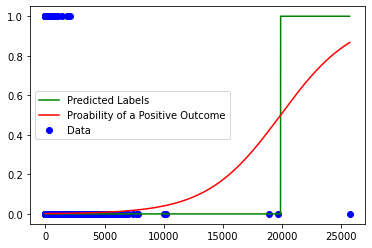

In [4]:
#instantiate sklearn's LogisticRegression and run an analysis on Amount and Class features
#initialize the regression object
CREDITLR=LogisticRegression(penalty="none", max_iter=10000)
creditlr=CREDITLR.fit(xtrain,ytrain)

#make the predictions using the regression model
xnew=np.reshape(np.linspace(0, max(xtest), len(xtest)), (-1,1))

y_pred=creditlr.predict(xnew) #this gives the label estimates
predict_proba1=creditlr.predict_proba(xnew)
prob_positive=predict_proba1[:,1] #this gets the probability of a positive outcome (fraud)

plt.scatter(xtest, ytest, color="blue", label="Data")
plt.plot(xnew, y_pred, color="green", label="Predicted Labels")
plt.plot(xnew, prob_positive, color='red', label="Proability of a Positive Outcome")
plt.legend()
plt.show()



note: This classifier is not useful for finding fraudulent transactions beacuse it has almost no ability to find fraudulent cases. This makes sense since there are only very few fraudulent cases in the data set, and even more so when we take into account that we are only training or model on one out of 28 features.

In [6]:
#define a function to compute some statistics on the regression performed
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
ypred=creditlr.predict(xtest)
compute_performance(ypred,ytest, creditlr.classes_)




tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 1.0


In [7]:
#now fit a logistic regression model to the training data using all variables except the target
# Code for Question 6
X=df.drop("Class",axis="columns").values
y=df.Class.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X,
                                                y, 
                                                test_size=0.5, 
                                                random_state=0)
CREDITLR2=LogisticRegression(solver="lbfgs", penalty="none",max_iter=10000)
creditlr2=CREDITLR2.fit(Xtrain, ytrain)
print(creditlr2.coef_[0][29])

-0.006372230709130265


From the above regression: The coefficient for Amounts is negative, meaning that it is less likely for a larger amount to be associated with fraud. When a larger amount is multiplied by this coefficient and added to the intercept, the probability that this is a positive event will be smaller than that of a smaller amount multiplied by the same coefficient and added to the same intercept.



In [8]:
#now compute the label-based criteria for the test set
ypred=creditlr2.predict(Xtest)
compute_performance(ypred, ytest, creditlr2.classes_)

tp: 154 tn: 142132 fp: 29 fn: 89
Accuracy: 0.999 Recall: 0.634 Precision: 0.842 Sensitivity: 0.634 Specificity: 1.0


note: since this classifier actually has a nono-zero number of true-positive labels it is therefore better than the Amount-only classifier at identifying fraudulent transactions.

0.42178603619387894

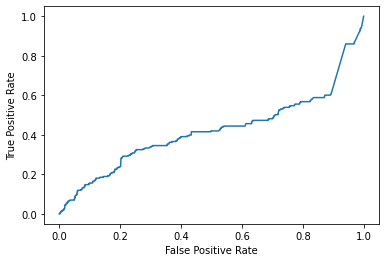

In [13]:
#plot an ROC curve and report the AUROC for each classifier
# ROC for Amount-only classifier
ytest_amount_only=creditlr.predict_proba(xtest)
fpr, tpr,_= roc_curve(ytest, ytest_amount_only[:,1], pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
auc(fpr, tpr)

0.9276453582174248

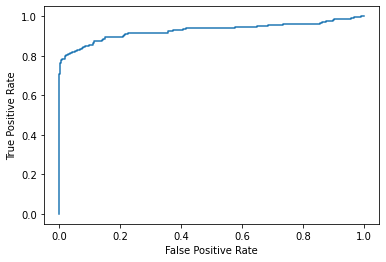

In [14]:
# ROC for all-variable classifier
ytest_all_variable=creditlr2.predict_proba(Xtest)
fpr, tpr,_=roc_curve(ytest, ytest_all_variable[:,1], pos_label=1)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
auc(fpr, tpr)

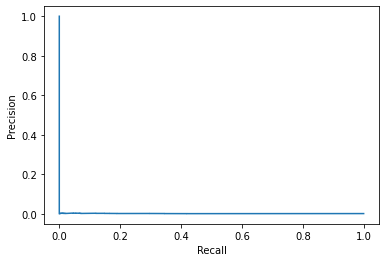

In [16]:
#now plot precision-recall curves for both of the classifiers
# PRC for Amount-only classifier
ytest_amount_only=creditlr.predict_proba(xtest)
precision, recall,_= precision_recall_curve(ytest, ytest_amount_only[:,1], pos_label=1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

Text(0, 0.5, 'Precision')

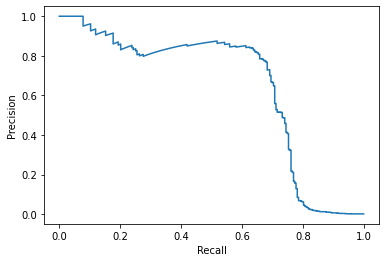

In [17]:
# PRC for all-variable classifier
ytest_all_variable=creditlr2.predict_proba(Xtest)
precision, recall,_=precision_recall_curve(ytest, ytest_all_variable[:,1], pos_label=1)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")

Conclusion: 
The all-variable classifier has a precision of about 80% for the 60% recall, while the amount-only classifier has 0% precision for this recall, therefore the all-variable classifier is preferable.

